In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
fred_key = '751575f7ec529eb18a510aaea2eb947f'


# 1. Create The Fred Object

In [32]:
fred = Fred(api_key = fred_key)

# 2. Search for Economic data 

In [35]:
sp_search = fred.search('S&P', order_by='popularity')

In [37]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-16,2023-07-16,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-14 09:14:07-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-16,2023-07-16,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-16,2023-07-16,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-14 09:14:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-16,2023-07-16,S&P 500,2013-07-15,2023-07-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-14 19:10:51-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-16,2023-07-16,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


# 3. Pull Raw Data & Plot

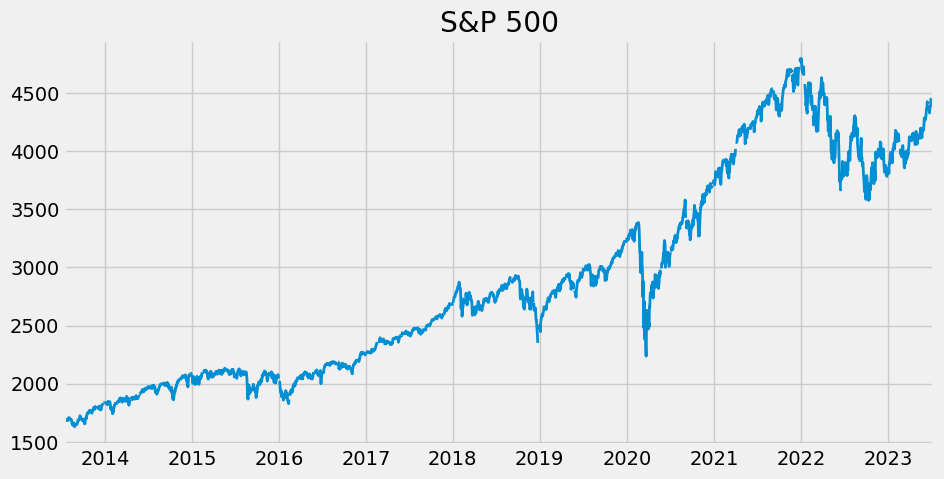

In [46]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title= "S&P 500", lw=2)
plt.show()

# 4. Pull and Join Multiple Series

In [47]:
unemployment_results = fred.search('unemployment')

In [49]:
unrate = fred.get_series('UNRATE')

<Axes: >

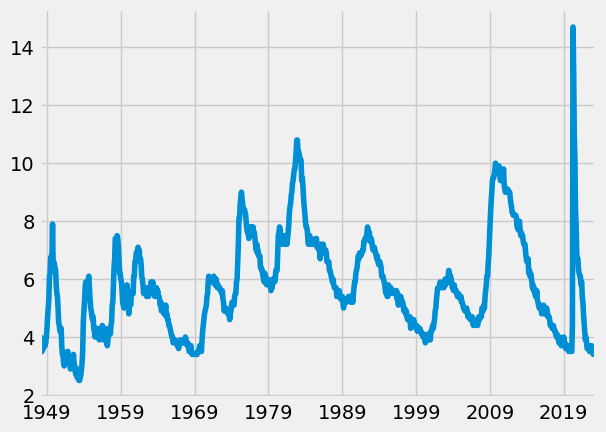

In [51]:
unrate.plot()

In [64]:
unemp_df = fred.search('unemployment rate state', filter= ('frequency', 'Monthly'))

In [66]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-16,2023-07-16,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-07-16,2023-07-16,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-07-16,2023-07-16,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-07-07 07:45:05-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-07-16,2023-07-16,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:12-05:00,63,The series comes from the 'Current Population ...
CAUR,CAUR,2023-07-16,2023-07-16,Unemployment Rate in California,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-20 14:30:02-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA50,LBSSA50,2023-07-16,2023-07-16,Labor Force Participation Rate for Vermont,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-16 09:01:15-05:00,1,A state's labor-force participation rate is th...
LBSSA46,LBSSA46,2023-07-16,2023-07-16,Labor Force Participation Rate for South Dakota,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-16 09:01:12-05:00,3,A state's labor-force participation rate is th...
LBSSA33,LBSSA33,2023-07-16,2023-07-16,Labor Force Participation Rate for New Hampshire,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-16 09:01:15-05:00,2,A state's labor-force participation rate is th...
